<a href="https://colab.research.google.com/github/yGit741/comdepri/blob/main/local_global_simulation_basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
import tqdm.notebook as tdqm
GLOBAL=1
LOCAL=0
def gain_func(s,n,k=0.5):
  return (s**n)/((s**n)+(k**n))

def simulate_sampling_trials(global_prob,local_s,global_s,n,max_steps,num_reps,global_direction,local_direction,intention,threshold=5):
  """
  @returns: RT of positive threshold, RT of negative threshold, congruency
  """
  # TODO - how to modulate global probability by intention
  if intention==GLOBAL:
    pass # change global_prob
  if intention==LOCAL:
    pass # change global_prob

  # choose for each trial and each timestep if what is sampled is local or global
  signal = np.random.binomial(1,global_prob,(num_reps,max_steps)).astype(float)
  signal[signal==LOCAL]=local_s
  signal[signal==GLOBAL]=global_s
  # pass the chosen local/global signals through the gain function
  signal_gain = gain_func(signal,n)
  # transform gains according to directions
  signal_gain[signal==local_s]*=local_direction
  signal_gain[signal==global_s]*=global_direction
  # calculate the cumulative sum of the gain modulated signals
  signal_gain_sum = signal_gain.cumsum(axis=1)
  # find the column indices in which a decision was reached
  rt = (np.abs(signal_gain_sum)>=threshold).argmax(axis=1)
  signal_sum_at_decision_times = signal_gain_sum[np.arange(signal_gain_sum.shape[0]),rt]
  # divide the decisions based on positive/negative threshold
  positive_threshold_rt = rt[signal_sum_at_decision_times>=threshold]
  negative_threshold_rt = rt[signal_sum_at_decision_times<=-threshold]
  return [positive_threshold_rt,negative_threshold_rt,global_direction==local_direction]







In [ ]:
my_dict = { 'Ali': 9, 'Sid': 1, 'Luna': 7, 'Sim': 12, 'Pooja': 4, 'Jen': 2}
with open('data.json', 'wb') as fp:
    pickle.dump(my_dict, fp)

with open('data.json', 'rb') as fp:
    data = pickle.load(fp)


In [10]:
with open('data.json', 'w') as fp:
    json.dump(dict, fp)

with open('data.json') as f:
    data = f.read()
  
print("Data type before reconstruction : ", type(data))
      
# reconstructing the data as a dictionary
js = json.loads(data)

print(type(js))

Data type before reconstruction :  <class 'str'>
<class 'dict'>


In [ ]:
#simulate_sampling_trials(global_prob=0.35,local_s=0.45,global_s=0.55,n=12,max_steps=10000,num_reps=5,global_direction=1,local_direction=-1,intention='GLOBAL',threshold=5)

def average_fun(global_prob=0.3,local_s=0.45,global_s=0.55,n=12,max_steps=10000,num_reps=50,global_direction=1,local_direction=-1,intention='GLOBAL',threshold=5):
  trial_array = simulate_sampling_trials(global_prob=global_prob,local_s=local_s,global_s=global_s,n=n,max_steps=max_steps,
                                         num_reps=num_reps,global_direction=global_direction,local_direction=local_direction,intention=intention,threshold=threshold)
  print(trial_array)
  pos_average = np.average(trial_array[0])
  pos_length = len(trial_array[0])
  pos_accuracy = pos_length/num_reps
  neg_average = np.average(trial_array[1])
  neg_length = len(trial_array[1])
  neg_accuracy = neg_length/num_reps
  return pos_average, pos_accuracy, neg_average,neg_accuracy

average_fun()  


[array([ 64,  81,  14,  86,  24,  82, 165,  13,  90, 127,  68,  11, 153,
        23,  80,  45,  25,  82,  59,  28,  34, 145,  67,  37,  15,   7,
        96,  34,  73,  29,  85, 104,  72,  56,  16,  46,  18,  31, 122,
        33, 351,  45,  37, 112,  34,  25,  73,  32,  47,  34]), array([], dtype=int64), False]


/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


(64.6, 1.0, nan, 0.0)

In [ ]:
#@title #Run parameter space simulations
#@markdown go over the different possible parameters and perform the simulations to make sure that no fine-tuning is needed
max_steps = 1000
num_reps = 1000
g_prob = 0.2
result_dict = dict()
for local_s in np.linspace(0.1,0.45,2):
  for global_s in np.linspace(0.55,0.9,2):
    for n in [3,12]:#np.arange(3,17):
      for global_direction in [-1,1]:
        for local_direction in [-1,1]:
          for intention in [0,1]:
            key_str = f"local_s: {local_s} global_s: {global_s} n: {n} global_direction: {global_direction} local_direction: {local_direction} intention: {intention}"
            result_dict[key_str] = simulate_sampling_trials(g_prob,local_s,global_s,n,max_steps,num_reps,global_direction,local_direction,intention)





In [ ]:
#mini version

max_steps = 1000
num_reps = 100
#g_prob = 0.5
result_dict = dict()
for local_s in np.linspace(0.3,0.45,2):
  for global_s in np.linspace(0.55,0.9,2):
    for n in [3,6,12]:#np.arange(3,17):
      for global_direction in [-1,1]:
        for local_direction in [-1,1]:
          for intention in [1]: #[0,1]
            for g_prob in np.linspace(0.04,0.55, 15):
              key_str = f"g_prob: {g_prob} local_s: {local_s} global_s: {global_s} n: {n} global_direction: {global_direction} local_direction: {local_direction} intention: {intention}"
              result_dict[key_str] = simulate_sampling_trials(g_prob,local_s,global_s,n,max_steps,num_reps,global_direction,local_direction,intention)

print(result_dict)


{'g_prob: 0.04 local_s: 0.3 global_s: 0.55 n: 3 global_direction: -1 local_direction: -1 intention: 1': [array([], dtype=int64), array([25, 25, 23, 25, 23, 25, 23, 28, 28, 23, 25, 23, 23, 25, 28, 28, 21,
       23, 23, 28, 28, 21, 25, 25, 25, 25, 28, 25, 19, 23, 28, 25, 21, 28,
       23, 28, 25, 28, 25, 28, 23, 25, 23, 25, 28, 25, 24, 28, 25, 23, 28,
       28, 25, 28, 23, 28, 27, 25, 23, 23, 21, 25, 25, 25, 28, 25, 25, 28,
       28, 25, 21, 23, 25, 25, 23, 25, 28, 23, 25, 25, 25, 25, 21, 27, 23,
       23, 23, 25, 24, 25, 28, 23, 25, 28, 28, 25, 21, 25, 28, 28]), True], 'g_prob: 0.07642857142857143 local_s: 0.3 global_s: 0.55 n: 3 global_direction: -1 local_direction: -1 intention: 1': [array([], dtype=int64), array([20, 25, 28, 23, 28, 25, 19, 21, 23, 23, 22, 25, 25, 21, 19, 21, 23,
       21, 21, 23, 23, 23, 19, 25, 28, 28, 25, 25, 28, 21, 23, 19, 24, 28,
       23, 19, 19, 23, 19, 20, 21, 21, 19, 23, 19, 23, 25, 25, 27, 23, 23,
       19, 19, 28, 19, 25, 21, 23, 23, 21, 21, 23, 1

In [ ]:
print(np.linspace(0.3,0.45,50))

[0.3        0.30306122 0.30612245 0.30918367 0.3122449  0.31530612
 0.31836735 0.32142857 0.3244898  0.32755102 0.33061224 0.33367347
 0.33673469 0.33979592 0.34285714 0.34591837 0.34897959 0.35204082
 0.35510204 0.35816327 0.36122449 0.36428571 0.36734694 0.37040816
 0.37346939 0.37653061 0.37959184 0.38265306 0.38571429 0.38877551
 0.39183673 0.39489796 0.39795918 0.40102041 0.40408163 0.40714286
 0.41020408 0.41326531 0.41632653 0.41938776 0.42244898 0.4255102
 0.42857143 0.43163265 0.43469388 0.4377551  0.44081633 0.44387755
 0.44693878 0.45      ]


In [ ]:
#create filtering function

#"local_s: {local_s} global_s: {global_s} n: {n} global_direction: {global_direction} local_direction: {local_direction} intention: {intention}"

# filter by n - we want only specific n, and only incongrunent steps


global_direction = 1
local_direction =-1
n=7

str_to_search = f"n: {n}"
str_to_search_2 = f"global_direction: {global_direction}"
str_to_search_3 = f"local_direction: {local_direction}"



filtered = {key: value for key, value in result_dict.items() if str_to_search in key and str_to_search_2 in key and str_to_search_3 in key}
print(filtered)


{'local_s: 0.3 global_s: 0.55 n: 7 global_direction: 1 local_direction: -1 intention: 0': [array([30, 35, 47, 14, 68, 35, 37, 17, 67, 96, 58, 38, 63, 35, 39, 39, 27,
       65, 32, 37, 36, 36, 46, 21, 83, 25, 55, 42, 26, 79, 40, 38, 27, 22,
       24, 39, 60, 48, 59, 67, 36, 45, 85, 48, 50, 54, 29, 24, 30, 56, 63,
       35, 36, 54, 38, 27, 33, 53, 58, 41, 63, 51, 41, 42, 38, 42, 59, 64,
       46, 58, 98, 54, 99, 29, 25, 41, 36, 64, 35, 35, 31, 36, 81, 39, 46,
       67, 60, 37, 31, 54, 57, 35, 30, 26, 70, 56, 58, 28, 42, 59]), array([], dtype=int64), False], 'local_s: 0.3 global_s: 0.55 n: 7 global_direction: 1 local_direction: -1 intention: 1': [array([52, 37, 49, 54, 71, 38, 51, 68, 28, 40, 36, 27, 36, 36, 24, 58, 38,
       39, 52, 86, 65, 40, 64, 73, 60, 31, 50, 28, 66, 42, 89, 41, 27, 26,
       58, 61, 56, 76, 58, 52, 35, 26, 48, 52, 54, 23, 42, 37, 48, 62, 25,
       67, 41, 60, 49, 54, 42, 39, 63, 65, 37, 53, 22, 52, 77, 42, 42, 72,
       39, 53, 33, 62, 26, 83, 30, 58, 24, 

In [ ]:
#building a regular graph
#choose the 'set parameters' - i.e signal, direction, intention
#remove the value wanted from each value (average, accuracy)
#pair value with parameter chosen:

#print(result_dict)

#s = result_dict.items()
#can map only one of the result values

#this creates a tuple of the parameters as the key and maps to the value decided on
dictionary_map = dict(map( lambda x: (tuple(x[0].split(" ")),x[1]), result_dict.items()))
#this creates a tuple between the certain relevant index (or few indexes of the parameter) and the value (length or average)
second_dictionary_map = tuple(map(lambda x: (x[0][x[0].index('n:')+1], x[0][x[0].index('local_s:')+1], len(x[1][0]), np.average(x[1][0])), dictionary_map.items()))
#if the other parameters are filtered, this can create an xy graph
#if modified, it can create also an xyz graph






#s = map(lambda x : str(x[0]) + x[1], result_dict.items())

#myList = my_dict.items()
#myList = sorted(myList) 
#x, y = zip(*myList)

#create graph

#print(s)
print(dictionary_map)
print(second_dictionary_map)



{('local_s:', '0.3', 'global_s:', '0.55', 'n:', '5', 'global_direction:', '-1', 'local_direction:', '-1', 'intention:', '0'): [array([], dtype=int64), array([16,  8, 14, 13, 16, 13, 10, 15, 12, 11,  8, 23, 13, 15, 17, 15, 16,
       15, 16, 16, 14, 16, 16, 17, 16, 16, 21, 10, 15,  9, 15, 10, 16, 10,
       16, 25, 11, 14, 11, 12, 16, 13, 16, 25, 11, 15, 14, 14, 16,  8, 14,
       11, 19, 12,  9, 16, 23,  8, 12, 14, 17, 16, 15, 15, 14, 12, 16, 10,
       16, 17, 16, 20, 20, 19, 12, 18,  8,  9,  9, 10, 16, 17, 10, 21, 16,
       10, 16, 15, 12, 10, 23, 13, 14, 11, 16, 16, 13, 11, 15, 17]), True], ('local_s:', '0.3', 'global_s:', '0.55', 'n:', '5', 'global_direction:', '-1', 'local_direction:', '-1', 'intention:', '1'): [array([], dtype=int64), array([21, 10, 10, 16, 19, 19, 16, 15, 15, 14, 20, 16, 14, 13,  8, 14, 10,
       17, 17, 17, 18, 20, 14, 16, 16, 23,  9, 17, 14, 13, 10, 16, 11, 17,
       14, 14, 11, 12, 14, 10, 16, 16, 12, 15,  9, 13, 13, 15, 11, 11, 16,
       16, 11, 13, 11, 

/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


((0.04, '3', 0), (0.08, '3', 0), (0.11, '3', 0), (0.15, '3', 0), (0.19, '3', 0), (0.22, '3', 0), (0.26, '3', 0), (0.29, '3', 0), (0.33, '3', 2), (0.37, '3', 6), (0.4, '3', 37), (0.44, '3', 67), (0.48, '3', 90), (0.51, '3', 97), (0.55, '3', 100), (0.04, '6', 0), (0.08, '6', 0), (0.11, '6', 0), (0.15, '6', 0), (0.19, '6', 0), (0.22, '6', 0), (0.26, '6', 2), (0.29, '6', 8), (0.33, '6', 29), (0.37, '6', 69), (0.4, '6', 85), (0.44, '6', 97), (0.48, '6', 99), (0.51, '6', 100), (0.55, '6', 100), (0.04, '12', 0), (0.08, '12', 0), (0.11, '12', 0), (0.15, '12', 0), (0.19, '12', 7), (0.22, '12', 51), (0.26, '12', 84), (0.29, '12', 98), (0.33, '12', 100), (0.37, '12', 100), (0.4, '12', 100), (0.44, '12', 100), (0.48, '12', 100), (0.51, '12', 100), (0.55, '12', 100))
((0.04, '3', 0), (0.08, '3', 0), (0.11, '3', 0), (0.15, '3', 0), (0.19, '3', 0), (0.22, '3', 0), (0.26, '3', 0), (0.29, '3', 0), (0.33, '3', 2), (0.37, '3', 6), (0.4, '3', 37), (0.44, '3', 67), (0.48, '3', 90), (0.51, '3', 97), (0.55, 

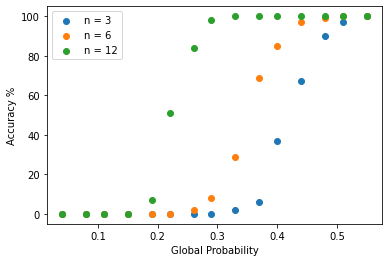

In [ ]:
#example graph

import matplotlib.pyplot as plt
#filter by set parameters

global_direction = 1
local_direction =-1
local_s = 0.45
global_s = 0.55
intention = 1

str_to_search = f"local_s: {local_s}"
str_to_search_2 = f"global_direction: {global_direction}"
str_to_search_3 = f"local_direction: {local_direction}"
str_to_search_4 = f"global_s: {global_s}"
str_5 = f"intention: {intention}"




filtered = {key: value for key, value in result_dict.items() if str_to_search in key and str_to_search_2 in key and str_to_search_3 in key and str_to_search_4 in key and str_5 in key}

#decide on values for graph
#this creates a tuple of the parameters as the key and maps to the value decided on
dictionary_map = dict(map( lambda x: (tuple(x[0].split(" ")),x[1]), filtered.items()))
#this creates a tuple between the certain relevant index (or few indexes of the parameter) and the value (length or average)
tuple_for_graph = tuple(map(lambda x: (round(float(x[0][x[0].index('g_prob:')+1]),2), x[0][x[0].index('n:')+1], len(x[1][0])), dictionary_map.items()))
print(tuple_for_graph)
#x,n_l,y=zip(*tuple_for_graph)
#print(x, n_l, y)
for n in [3,6,12]:
  tuple_filtered = tuple([(x,y,z) for (x,y,z) in tuple_for_graph if y==f"{n}"])
  print(tuple_filtered)
  x,y,z = zip(*tuple_filtered)
  plt.scatter(x,z, label = f"n = {n}")

#plt.scatter(x,y)
plt.xlabel("Global Probability")
plt.ylabel("Accuracy %")

plt.legend()
plt.show()


